In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
ss=pd.read_csv("bitcoins.csv")

In [4]:
ss

,date,Open,High,Low,close,Vol.,Change %
0,18-Jul-10,0,0.1,0.1,0.1,0.08K,0.00%
1,19-Jul-10,0.1,0.1,0.1,0.1,0.57K,0.00%
2,20-Jul-10,0.1,0.1,0.1,0.1,0.26K,0.00%
3,21-Jul-10,0.1,0.1,0.1,0.1,0.58K,0.00%
4,22-Jul-10,0.1,0.1,0.1,0.1,2.16K,0.00%
...,...,...,...,...,...,...,...
4122,30-Oct-21,"62,245.00","62,338.50","60,786.00",61840.1,40.51K,-0.65%
4123,31-Oct-21,"61,842.20","62,393.70","60,005.70",61309.6,50.06K,-0.86%
4124,01-Nov-21,"61,310.10","62,430.10","59,612.70",60915.3,61.21K,-0.64%
4125,02-Nov-21,"60,912.20","64,256.40","60,651.50",63221.7,65.26K,3.79%


In [5]:
ss['date'] = pd.to_datetime(ss['date'])

In [6]:
ss['Year'] = ss['date'].dt.year
ss['Month'] =ss['date'].dt.month
ss['Day'] = ss['date'].dt.day
ss['dayOfWeek'] = ss['date'].dt.day_name()
ss['WeekOfYear'] = ss['date'].dt.weekofyear

ss.head(419)

<ipython-input-6-0c7a00c14b51>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  ss['WeekOfYear'] = ss['date'].dt.weekofyear


,date,Open,High,Low,close,Vol.,Change %,Year,Month,Day,dayOfWeek,WeekOfYear
0,2010-07-18,0,0.1,0.1,0.1,0.08K,0.00%,2010,7,18,Sunday,28
1,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%,2010,7,19,Monday,29
2,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%,2010,7,20,Tuesday,29
3,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%,2010,7,21,Wednesday,29
4,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%,2010,7,22,Thursday,29
...,...,...,...,...,...,...,...,...,...,...,...,...
414,2011-09-05,8.2,8.2,7.3,7.6,30.80K,-6.97%,2011,9,5,Monday,36
415,2011-09-06,7.6,7.7,6.1,6.9,82.50K,-9.86%,2011,9,6,Tuesday,36
416,2011-09-07,6.9,7.6,6.5,7.2,49.64K,4.81%,2011,9,7,Wednesday,36
417,2011-09-08,7.2,7.2,6.5,6.5,31.89K,-9.18%,2011,9,8,Thursday,36


<AxesSubplot:xlabel='Month', ylabel='close'>

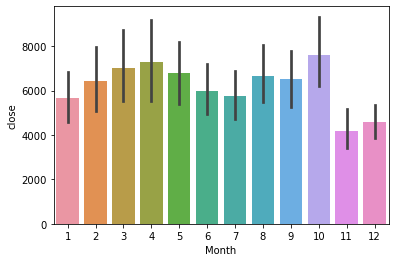

In [7]:
sns.barplot(x='Month', y='close', data=ss)

<AxesSubplot:xlabel='Day', ylabel='close'>

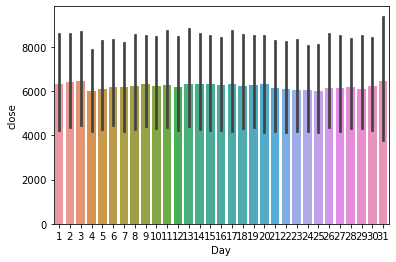

In [8]:
sns.barplot(x='Day', y='close', data=ss)

<AxesSubplot:xlabel='dayOfWeek', ylabel='close'>

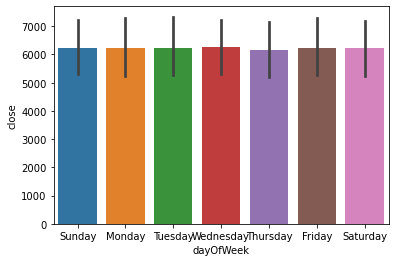

In [9]:
sns.barplot(x='dayOfWeek', y='close', data=ss)

<AxesSubplot:xlabel='WeekOfYear', ylabel='close'>

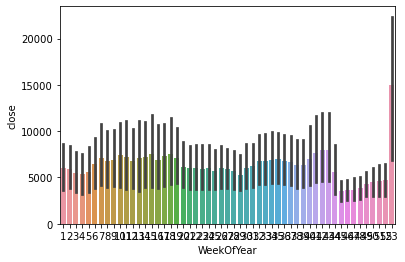

In [10]:
sns.barplot(x='WeekOfYear', y='close', data=ss)

<AxesSubplot:xlabel='Year', ylabel='close'>

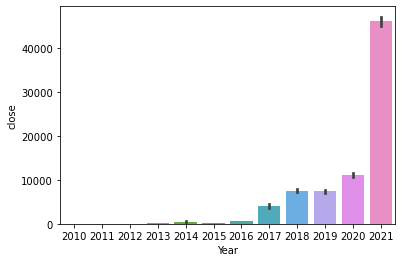

In [11]:
sns.barplot(x='Year', y='close', data=ss)

In [12]:
ss['dayOfWeek'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [13]:
ss.loc[ss['dayOfWeek']=='Sunday', 'dayOfWeek'] = 0
ss.loc[ss['dayOfWeek']=='Monday', 'dayOfWeek'] = 1
ss.loc[ss['dayOfWeek']=='Tuesday', 'dayOfWeek'] = 2
ss.loc[ss['dayOfWeek']=='Wednesday', 'dayOfWeek'] = 3
ss.loc[ss['dayOfWeek']=='Thursday', 'dayOfWeek'] = 4
ss.loc[ss['dayOfWeek']=='Friday', 'dayOfWeek'] = 5
ss.loc[ss['dayOfWeek']=='Saturday', 'dayOfWeek'] = 6

In [14]:
y=ss['close']

In [15]:
X = ss[['Day','dayOfWeek','Month','Year']]

In [16]:
poly2 = PolynomialFeatures(degree =2)
X_poly = poly2.fit_transform(X)

In [17]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=50, random_state=0)
regressor.fit(X_poly,y)

RandomForestRegressor(n_estimators=50, random_state=0)

In [18]:
print(regressor.score(X_poly,y))

0.999586432705594


In [19]:
Day = 6

dayOfWeek =1

Month =11
Year =2021


#Samples = Samples_31_July[0,0]
X1 = np.array([[Day,dayOfWeek,Month,Year]])
Total_infections  = regressor.predict(poly2.fit_transform(X1))

In [20]:
print('Total No of cases -> {}'.format(int(Total_infections[0])))

Total No of cases -> 61300


In [19]:
import pickle

pickle.dump(poly2,open('poly.pkl','wb'))
pol = pickle.load(open('poly.pkl','rb'))

In [20]:
import pickle

pickle.dump(regressor,open('regressor.pkl','wb'))
regresso = pickle.load(open('regressor.pkl','rb'))